In [1]:
import pandas as pd
import os
#import pygwalker as pyg
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
import numpy as np

In [2]:
path = %pwd
folder = r'C:\Users\35383\Desktop\WORKLOAD'


dataframes = []

for file in os.listdir(folder):
    
    if file.endswith('.csv'):    
        file_path = os.path.join(folder, file)
        df = pd.read_csv(file_path, header=None, names=['operation', 'function', 'value'])
        name, ext = file.split('.')
        db, f = name.split('-')
        df['database'] = db
        df['workloads'] = f
        dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)

df.sample(10)

,operation,function,value,database,workloads
22,INSERT,99thPercentileLatency(us),7575.000000,Mongo,A
4,TOTAL_GC_TIME_%_PS_Scavenge,Time(%),4.173442,Mongo,A
268,TOTAL_GC_TIME_%_PS_Scavenge,Time(%),0.337716,MySQL,F
11,CLEANUP,Operations,1.000000,Mongo,A
134,CLEANUP,MaxLatency(us),1950.000000,Mongo,F
63,CLEANUP,95thPercentileLatency(us),3063.000000,Mongo,C
139,INSERT,MinLatency(us),102.000000,Mongo,F
6,TOTAL_GC_TIME_PS_MarkSweep,Time(ms),0.000000,Mongo,A
112,CLEANUP,99thPercentileLatency(us),2965.000000,Mongo,E
185,INSERT,Operations,1000.000000,MySQL,B


In [3]:
df.shape

(288, 5)

In [4]:
import matplotlib.pyplot as plt

In [5]:
df.dtypes

operation     object
function      object
value        float64
database      object
workloads     object
dtype: object

In [6]:
df['value'] = pd.to_numeric(df['value'])

In [7]:
df.shape

(288, 5)

In [8]:
df.dtypes

operation     object
function      object
value        float64
database      object
workloads     object
dtype: object

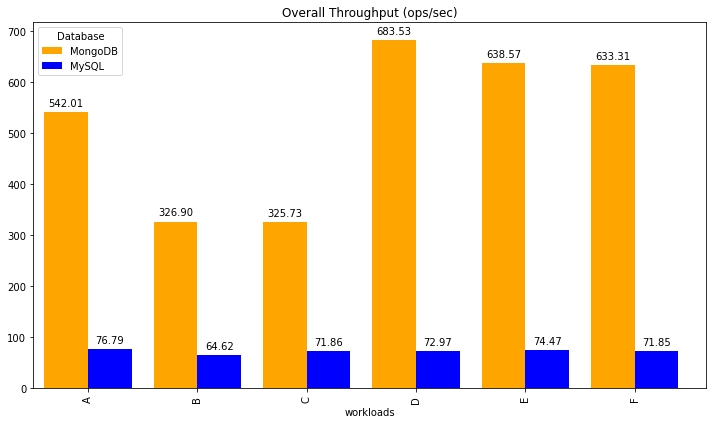

In [9]:
source = df[df.function == 'Throughput(ops/sec)']

#Filtrando dados por database para plotagem
mongo_data = source[source['database'] == 'Mongo']
mysql_data = source[source['database'] == 'MySQL']

# Criando gráficos
fig, ax = plt.subplots(figsize=(10, 6))
mongo_data.groupby('workloads')['value'].sum().plot(kind='bar', color='orange', position=1, width=0.4, label='MongoDB')
mysql_data.groupby('workloads')['value'].sum().plot(kind='bar', color='blue', position=0, width=0.4, label='MySQL')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

ax.set_xlim(left=-0.5)   
#plt.ylabel('Values')
plt.title('Overall Throughput (ops/sec)')
plt.legend(title='Database')
plt.tight_layout()
plt.show()




In [10]:
# Debugar o que está sendo plotado
for workload, group in mysql_data.groupby('workloads'):
    print(workload, group['value'].sum())

A 76.79311933650744
B 64.61617989144482
C 71.85972980741593
D 72.97139521307648
E 74.47125409591898
F 71.85456635769204


In [11]:
# Debugar o que está sendo plotado
for workload, group in mongo_data.groupby('workloads'):
    print(workload, group['value'].sum())


A 542.0054201
B 326.9042171
C 325.732899
D 683.5269993
E 638.5696040868455
F 633.3122229259025


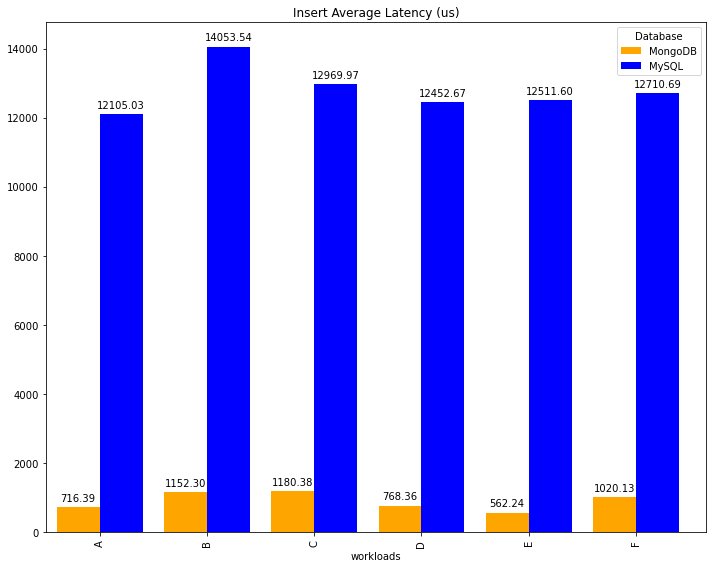

In [12]:
average = df[(df['operation'] == 'INSERT') & (df['function'] == 'AverageLatency(us)')]

#Filtrando dados por database para plotagem
mongo_data1 = average[average['database'] == 'Mongo']
mysql_data1 = average[average['database'] == 'MySQL']

# Criando gráficos
fig, ax = plt.subplots(figsize=(10, 8))
mongo_data1.groupby('workloads')['value'].sum().plot(kind='bar', color='orange', position=1, width=0.4, label='MongoDB')
mysql_data1.groupby('workloads')['value'].sum().plot(kind='bar', color='blue', position=0, width=0.4, label='MySQL')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

ax.set_xlim(left=-0.5)   
plt.title('Insert Average Latency (us)')
plt.legend(title='Database')
plt.tight_layout()
plt.show()


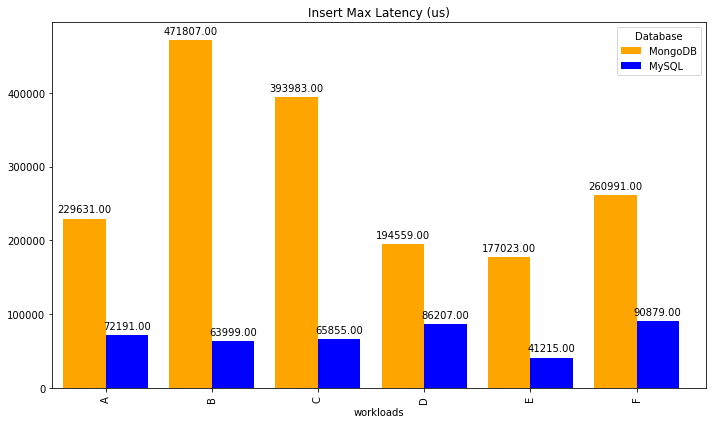

In [13]:
max_latency = df[(df['operation'] == 'INSERT') & (df['function'] == 'MaxLatency(us)')]

#Filtrando dados por database para plotagem
mongo_data2 = max_latency[max_latency['database'] == 'Mongo']
mysql_data2 = max_latency[max_latency['database'] == 'MySQL']

# Criando gráficos
fig, ax = plt.subplots(figsize=(10, 6))
mongo_data2.groupby('workloads')['value'].sum().plot(kind='bar', color='orange', position=1, width=0.4, label='MongoDB')
mysql_data2.groupby('workloads')['value'].sum().plot(kind='bar', color='blue', position=0, width=0.4, label='MySQL')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

ax.set_xlim(left=-0.5)   
#plt.ylabel('Values')
plt.title('Insert Max Latency (us)')
plt.legend(title='Database')
plt.tight_layout()
plt.show()

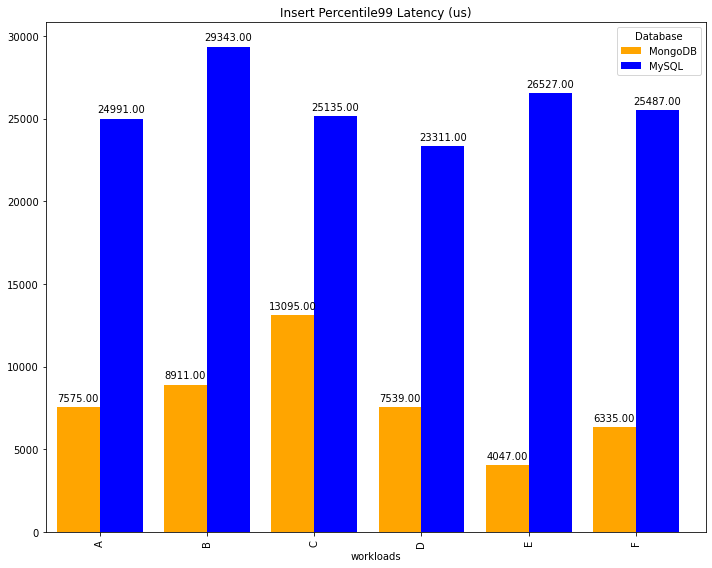

In [14]:
percentile99_latency = df[(df['operation'] == 'INSERT') & (df['function'] == '99thPercentileLatency(us)')]

#Filtrando dados por database para plotagem
mongo_data3 = percentile99_latency[percentile99_latency['database'] == 'Mongo']
mysql_data3 = percentile99_latency[percentile99_latency['database'] == 'MySQL']

# Criando gráficos
fig, ax = plt.subplots(figsize=(10, 8))
mongo_data3.groupby('workloads')['value'].sum().plot(kind='bar', color='orange', position=1, width=0.4, label='MongoDB')
mysql_data3.groupby('workloads')['value'].sum().plot(kind='bar', color='blue', position=0, width=0.4, label='MySQL')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

ax.set_xlim(left=-0.5)   
#plt.ylabel('Values')
plt.title('Insert Percentile99 Latency (us)')
plt.legend(title='Database')
plt.tight_layout()
plt.show()

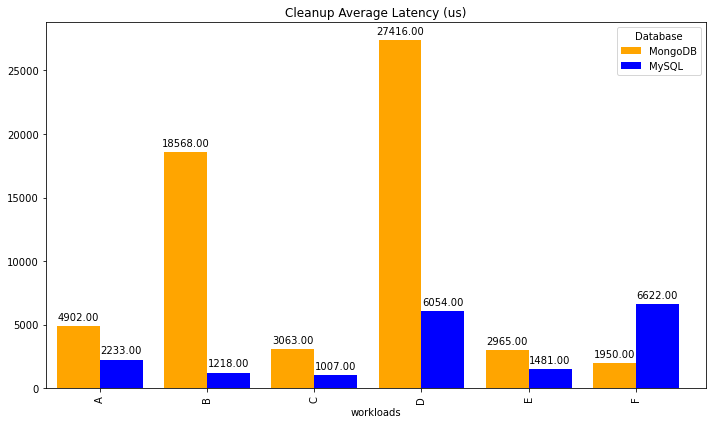

In [15]:
average = df[(df['operation'] == 'CLEANUP') & (df['function'] == 'AverageLatency(us)')]

#Filtrando dados por database para plotagem
mongo_data4 = average[average['database'] == 'Mongo']
mysql_data4 = average[average['database'] == 'MySQL']

# Criando gráficos
fig, ax = plt.subplots(figsize=(10, 6))
mongo_data4.groupby('workloads')['value'].sum().plot(kind='bar', color='orange', position=1, width=0.4, label='MongoDB')
mysql_data4.groupby('workloads')['value'].sum().plot(kind='bar', color='blue', position=0, width=0.4, label='MySQL')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

ax.set_xlim(left=-0.5)   
plt.title('Cleanup Average Latency (us)')
plt.legend(title='Database')
plt.tight_layout()
plt.show()

In [16]:
table = pd.pivot_table(df, values='value', index=['operation', 'function'],
                       columns=['workloads','database'], aggfunc=np.mean)

table = table.style.format('{:.0f}')

cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
table.set_table_styles([cell_hover, index_names, headers])


table.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

table.set_table_styles({
    ('b', 'mongo'): [{'selector': 'th', 'props': 'border-left: 1px solid white'},
                               {'selector': 'td', 'props': 'border-left: 1px solid #000066'}],
    ('c', 'mongo'): [{'selector': 'th', 'props': 'border-left: 1px solid white'},
                               {'selector': 'td', 'props': 'border-left: 1px solid #000066'}],
    ('d', 'mongo'): [{'selector': 'th', 'props': 'border-left: 1px solid white'},
                               {'selector': 'td', 'props': 'border-left: 1px solid #000066'}],
    ('e', 'mongo'): [{'selector': 'th', 'props': 'border-left: 1px solid white'},
                               {'selector': 'td', 'props': 'border-left: 1px solid #000066'}],
    ('f', 'mongo'): [{'selector': 'th', 'props': 'border-left: 1px solid white'},
                               {'selector': 'td', 'props': 'border-left: 1px solid #000066'}],
}, overwrite=False, axis=0)

table